#FoodHub Data Analysis


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Understanding the structure of the data

In [4]:
from google.colab import drive
drive.mount("/content/drive")

# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

How many rows and columns are present in the data?

In [5]:
df.shape

(1898, 9)

#### Observations: The data frame has 1898 rows and 0 columns


What are the datatypes of the different columns in the dataset?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: 4 integers; 4 objects, 1 float


Are there missing values in the data?

In [7]:
print(df.isnull().sum())

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations: no nulls. If there were, we would have used: df = df.dropna(). Allegedly we have no missing values, but as we will see later, this is not the case.


Statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?  

In [8]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations: Minimum: 20 minutes; average: 27.37 minutes; maximum: 35 minutes


How many orders are not rated?

In [9]:
df.groupby(["rating"])["order_id"].count() # 736 orders are not rated

,order_id
rating,
3,188
4,386
5,588
Not given,736


#### Observations:  
* 736 orders are not rated. Although this is not null, they are missing values.
* Rating starts from 3 and ends at 5. No low ratings. This will be an obstacle in analysing one of the most important KPIs - Customer satisfaction, as we will not se distinctive differences in ratings.


# **Exploratory Data Analysis (EDA)**

### Univariate Analysis

Explore all the variables and provide observations on their distributions

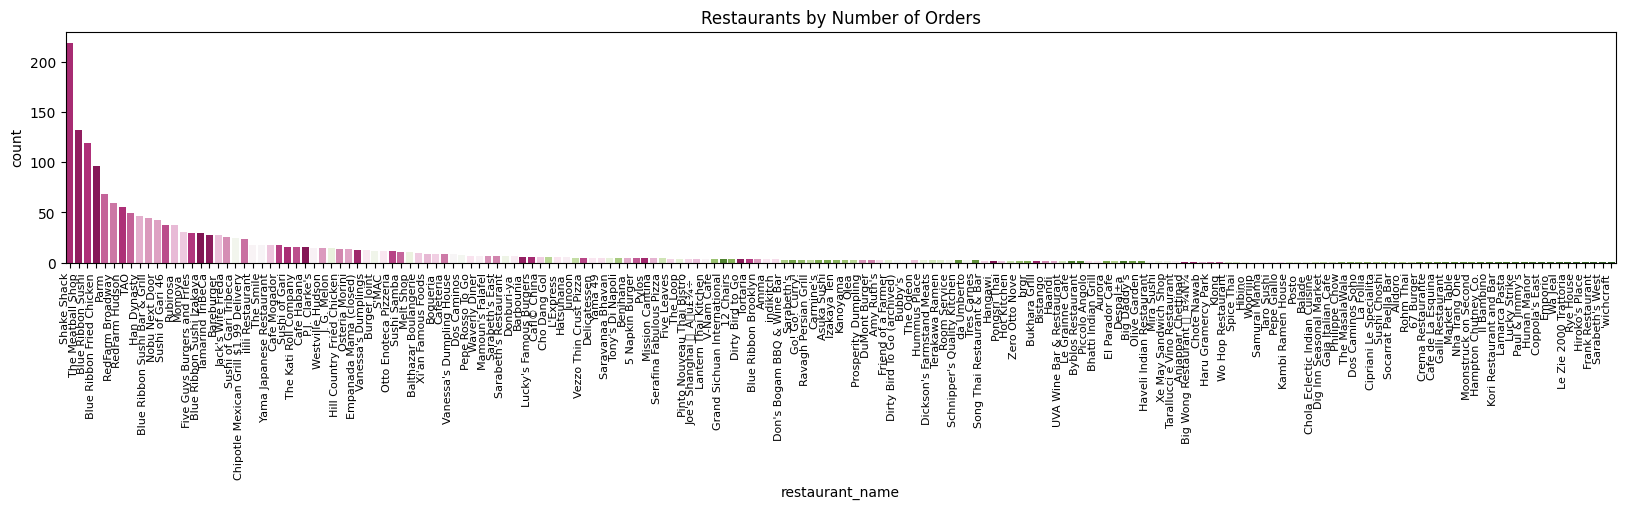

In [10]:
# restaurant_name - distribution
order = df['restaurant_name'].value_counts().index    # setting order
sns.countplot(data=df, x='restaurant_name', hue = 'restaurant_name', order=order, palette='PiYG') # Calling countplot
plt.xticks(rotation=90, ha='right', fontsize=8)  # for readbility
figure=plt.gcf()
figure.set_size_inches(20, 3)
plt.title('Restaurants by Number of Orders')
plt.show()


# Observations:
* It is very busy on the eye, but we can see that we have many restaurants, 1 has more than 200 orders (more than 10% of total orders)
* Few have more than 100, and the vast majority have less than 50. this is a
* Long Tale - It is a very skewed distribution.
lets further examine the distibution of # of orders ny restaurant.

In [11]:
# Creating a df that groups data by restaurant and not by order id:
dfres = (
    df.groupby('restaurant_name')['order_id']
    .count()
    .reset_index()
    .rename(columns={'order_id': 'num_orders'})
)

dfres.describe()

,num_orders
count,178.000000
mean,10.662921
std,24.047008
min,1.000000
25%,1.000000
50%,3.000000
75%,8.750000
max,219.000000


Observation: we can see how uneven is the distribuition: the mean (10.6) is more than 3 times the median. the outliers

<Axes: xlabel='num_orders'>

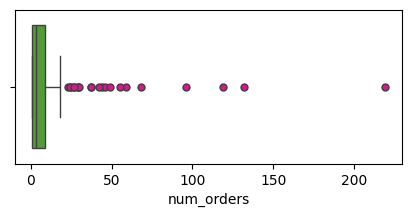

In [12]:
plt.figure(figsize=(5, 2))
sns.boxplot(
    data=dfres,
    x='num_orders',
    color='#4dac26',
    flierprops=dict(marker='o', markerfacecolor='#d01c8b', markersize=5, linestyle='none')
)

In [13]:
# Customers Univariate: Let's group data by customer.
# Creating a dataframe gouped by customer
dfcust = (
    df.groupby('customer_id')['order_id']
    .count()
    .reset_index()
    .rename(columns={'order_id': 'num_orders'})
)

dfcust.describe()


,customer_id,num_orders
count,1200.000000,1200.000000
mean,177202.828333,1.581667
std,117661.960754,1.090560
min,1311.000000,1.000000
25%,77543.000000,1.000000
50%,133212.000000,1.000000
75%,294304.000000,2.000000
max,405334.000000,13.000000


# Observations:
* We have 1200 unique app users
* We have a churn problem. At least half of them made only one order - 'One Timers'. We would examine it and ways to deal with it in the multivariate analysis.

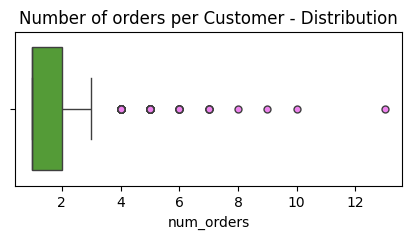

In [14]:
plt.figure(figsize=(5, 2))
sns.boxplot(data=dfcust, x='num_orders', color='#4dac26',
    flierprops=dict(marker='o', markerfacecolor='violet', markersize=5, linestyle='none'))
plt.title('Number of orders per Customer - Distribution')
plt.show()

# Observation:
Only 25% ordered 3 times and more (excl. IQRs). Loyalty is very low

Text(0.5, 1.0, 'Is Loyal')

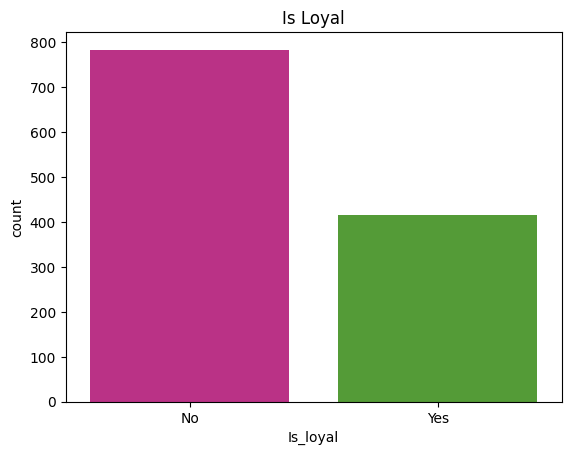

In [15]:
#  Let's mark "Loyal" customers (More than 1 order):

dfcust['Is_loyal'] = dfcust['num_orders'].apply(lambda x: 'Yes' if x > 1 else 'No') # creating the column using lambda expression
sns.countplot(data=dfcust, x='Is_loyal', hue='Is_loyal', palette={'Yes': '#4dac26', 'No': '#d01c8b'})
plt.title('Is Loyal')


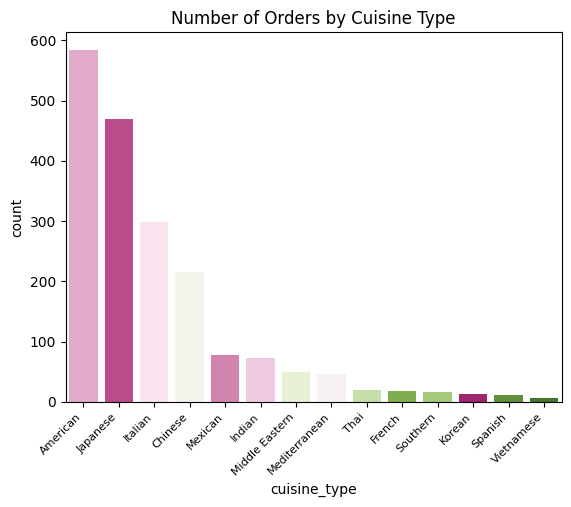

In [16]:
# cuisine_type - univariate exploration:
order = df['cuisine_type'].value_counts().index   # Setting Order
sns.countplot(data=df, x='cuisine_type', hue='cuisine_type', order=order, palette='PiYG')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.title('Number of Orders by Cuisine Type')
plt.show()

# Observations:
* Almost 600 orders out of 1898, around 30% of all orders, are from American cuisine. next most popular is Japaneese, and in the 3rd place - Italian.
* Least popular by # of orders are the Vietnamese, Spanish and French cuisines, in terms of # of orders.
* It is important to note that we are measuring # of online orders, and not "absulute popularity", so for example, it is might be that French and Spanish cuisines are * very popular but due to the cuisisne characteristics, are less suitable for online orders and delivery.

Text(0.5, 1.0, 'Cost of Order Distribution')

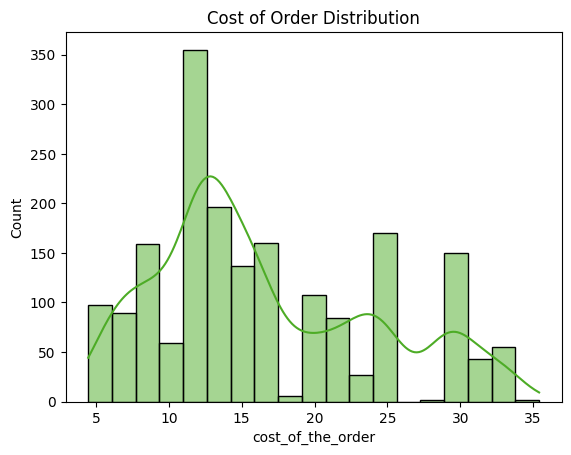

In [17]:
# cost_of_the_order - univariate

sns.histplot(data=df, x="cost_of_the_order", kde=True, color='#4dac26') # calling histogram
plt.title('Cost of Order Distribution')

Observations:
* We see a consentration of orders around 12-14USD. higher than that we see a local, less prominent peaks around 25USD and 30USD
* Cheaper orders, less than 10USD are also popular, but not as 12-14USD.

Text(0.5, 1.0, 'Cost of Order Distribution')

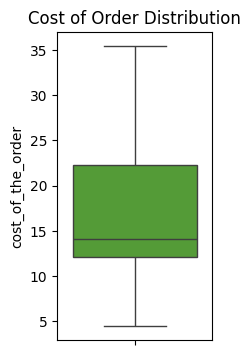

In [18]:
plt.figure(figsize=(2, 4))
sns.boxplot(data=df, y="cost_of_the_order", color = '#4dac26')
plt.title('Cost of Order Distribution')

# Observations
* The Box & Whiskers graph reveals that the median is around  14USD, not far away from the mean (16.5USD in the describe() part), and no outliars.
* 50% of the orders are consntrated in a very limited range: 12-23USD.
#Final conclusions:
There is a minimum price barrier (due to delivery cost among others) that prevent orders from being too cheap, while on the other hand no one orders fancy meals in a carton or plastic boxes. For these, people prefer to sit in the restaurant. so the vast majority of orders are within a limited range of prices.

<Axes: xlabel='day_of_the_week', ylabel='Count'>

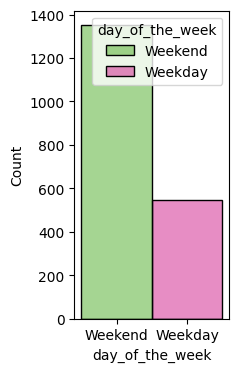

In [19]:
# day_of_the_week - univariate
plt.figure(figsize=(2, 4))
sns.histplot(data=df, x="day_of_the_week", hue='day_of_the_week', palette={'Weekend': '#4dac26', 'Weekday': '#d01c8b'})

# Observation:
Most of the orders are on the weekend. Yes. Many people may tend to order from restaurants on the weekend, but many others are on a totally different category.The figures indicate that the app users do not belong to the growing segment of those who order lunch to the office. We are loosing audience here.

Text(0.5, 1.0, 'Rating -  Distribution')

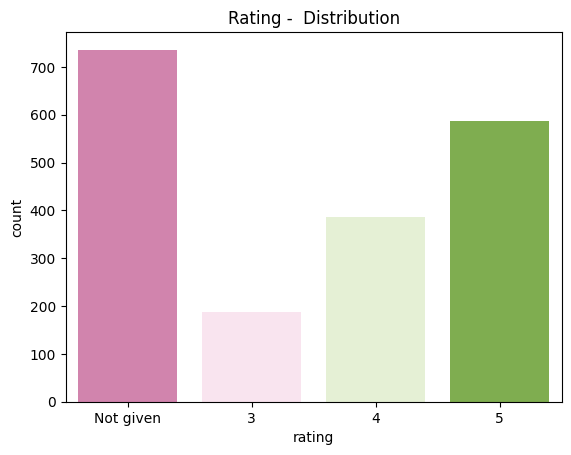

In [20]:
# rating - univariate
order = ['Not given', 3, 4, 5]
sns.countplot(data=df, x="rating", order=order, palette='PiYG')
plt.title('Rating -  Distribution')


# Observations:
* The mode is 'Not given' accounts for almost 40% of the orders.
* Among the rated orders - 5 is the most common.
* These missing values, and the tight scale between 3 and 5 will make our lives hard in the multivariate analysis.

Text(0.5, 1.0, 'Food preparation time -  Distribution')

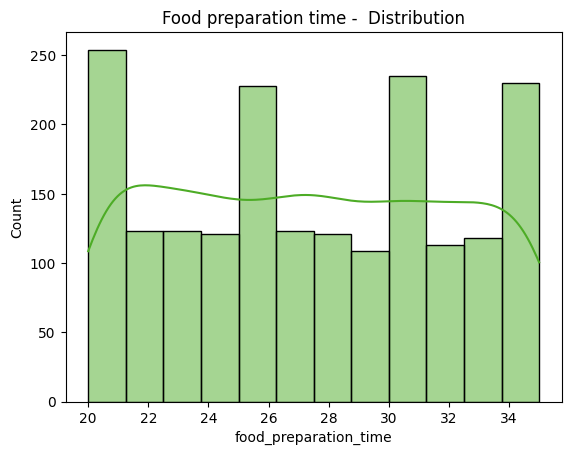

In [21]:
 # food_preparation_time - univariate

sns.histplot(data=df, x="food_preparation_time", kde=True, color = '#4dac26')
plt.title('Food preparation time -  Distribution')

# Observations:
* The distribution is between 20 to 35 minutes. Quite evenly, except for peaks at 20, 26, 31 and 35 minutes.
* One plausible reason can be fixed preperation times of popular American and Italian fast food dishes: Burgers, Pizzas, Pasta etc.

Text(0.5, 1.0, 'Food preparation time -  Distribution')

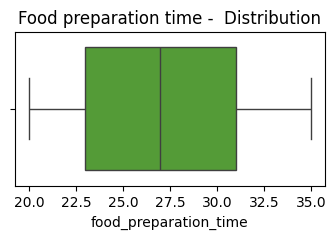

In [22]:
plt.figure(figsize=(4, 2))
sns.boxplot(data=df, x="food_preparation_time", color='#4dac26')
plt.title('Food preparation time -  Distribution')

# Observations:
* A boxplot shows an almost symetric distribution 50% of orders prepared in a range between 23 and 31 mins
* The median stans on ~27, the mean was also around 27 in describe())  - An almost symetric distribution
* No outliers.

Text(0.5, 1.0, 'Delivery Time -  Distribution')

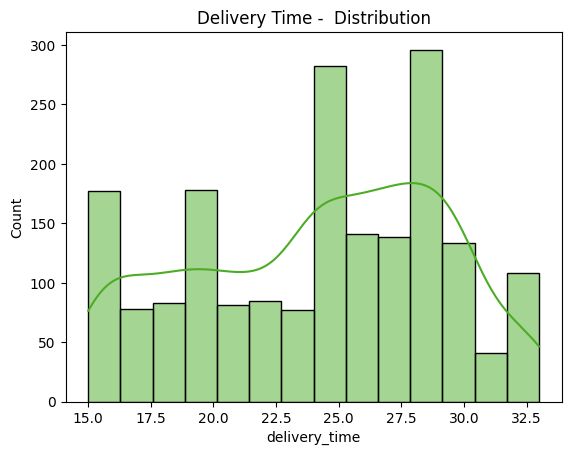

In [23]:
# Delivery time - Univariate
sns.histplot(data=df, x="delivery_time", kde=True, color='#4dac26')
plt.title('Delivery Time -  Distribution')

# Observations:
* Min delivery time stands on 15 mins. there is a concentration between 25 and 29.
* It is possible that 30 mins is a deadline from which many restaurants offer a discount or free delivery, so delivery guys try to meet the deadline.
* Peaks in 5 mins intervals: 15, 20, 25, and 29 - one minute before alleged deadline.

Text(0.5, 1.0, 'Delivery Time -  Distribution')

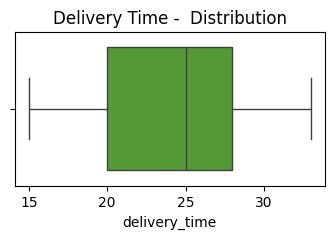

In [24]:
plt.figure(figsize=(4, 2))
sns.boxplot(data=df, x="delivery_time", color='#4dac26')
plt.title('Delivery Time -  Distribution')

#Observation:
The distribution is only a bit skewed to the left.

Top 5 restaurants in terms of the number of orders received?

In [25]:
top5res = dfres.sort_values('num_orders', ascending=False)
top5res.head()

,restaurant_name,num_orders
136,Shake Shack,219
153,The Meatball Shop,132
21,Blue Ribbon Sushi,119
20,Blue Ribbon Fried Chicken,96
109,Parm,68


# top 5 restaurants in terms of the number of orders received
1) Shake Shack 2)The Meatball Shop 3) Blue Ribbon Sushi 4) Blue Ribbon Fried Chicken 5) Parm

Most popular cuisine on weekends

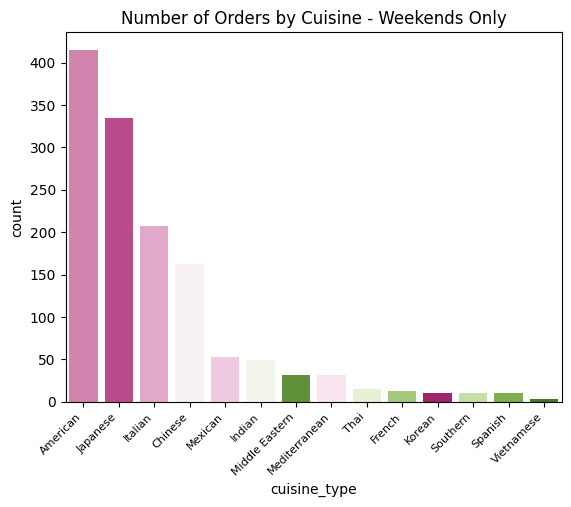

In [26]:
dfw = df[df['day_of_the_week']=='Weekend']
order= dfw['cuisine_type'].value_counts().index
sns.countplot(data=dfw, x='cuisine_type', hue='cuisine_type', order=order, palette='PiYG')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.title('Number of Orders by Cuisine - Weekends Only')
plt.show()

#### Observations:
the distribution did not change dramatically. Amarican is the most popular even if we limit orders to weekend only.


Percentage of the orders cost more than 20 dollars

Text(0.5, 1.0, 'Orders Over $20')

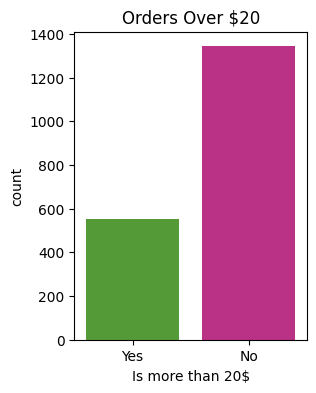

In [27]:
plt.figure(figsize=(3, 4))
df['Is more than 20$'] = df['cost_of_the_order'].apply(lambda x: 'Yes' if x > 20 else 'No')
sns.countplot(data=df, x='Is more than 20$', hue='Is more than 20$',  palette={'Yes': '#4dac26', 'No': '#d01c8b'})
plt.title('Orders Over $20')

In [28]:
percent_distribution = df['Is more than 20$'].value_counts(normalize=True) * 100
percent_distribution = percent_distribution.round(1).astype(str) + '%'
print(percent_distribution)

Is more than 20$
No     70.8%
Yes    29.2%
Name: proportion, dtype: object


#### Observations:
~71% of orders are not over 20

Mean order delivery time

In [29]:
df['delivery_time'].mean()

np.float64(24.161749209694417)

#### Observations:
 the mean is ~24 mins and higher than median. that correspponds to the skewnwss we saw in the boxplot.

Lets say that the company has decided to give 20% discount vouchers to the top 3 most frequent customers. How can we find IDs of these customers and the number of orders they placed?

In [30]:
customer_orders = df.groupby('customer_id')['order_id'].count()  # grouping by customer_id
customer_orders = customer_orders.reset_index() # resetting index - not mandatory
customer_orders = customer_orders.rename(columns={'order_id': 'num_orders'}) # renaming aggregated column
customer_orders = customer_orders.sort_values('num_orders', ascending=False) # sorting
top3 = customer_orders.head(3) # top 3
print(top3)

     customer_id  num_orders
116        52832          13
84         47440          10
333        83287           9


#### Observations:
No.1 customer 52832 with 13 orders
No.2 customer 47440 with 10 orders
No.3 customer 83287 with 9 orders

### Multivariate Analysis

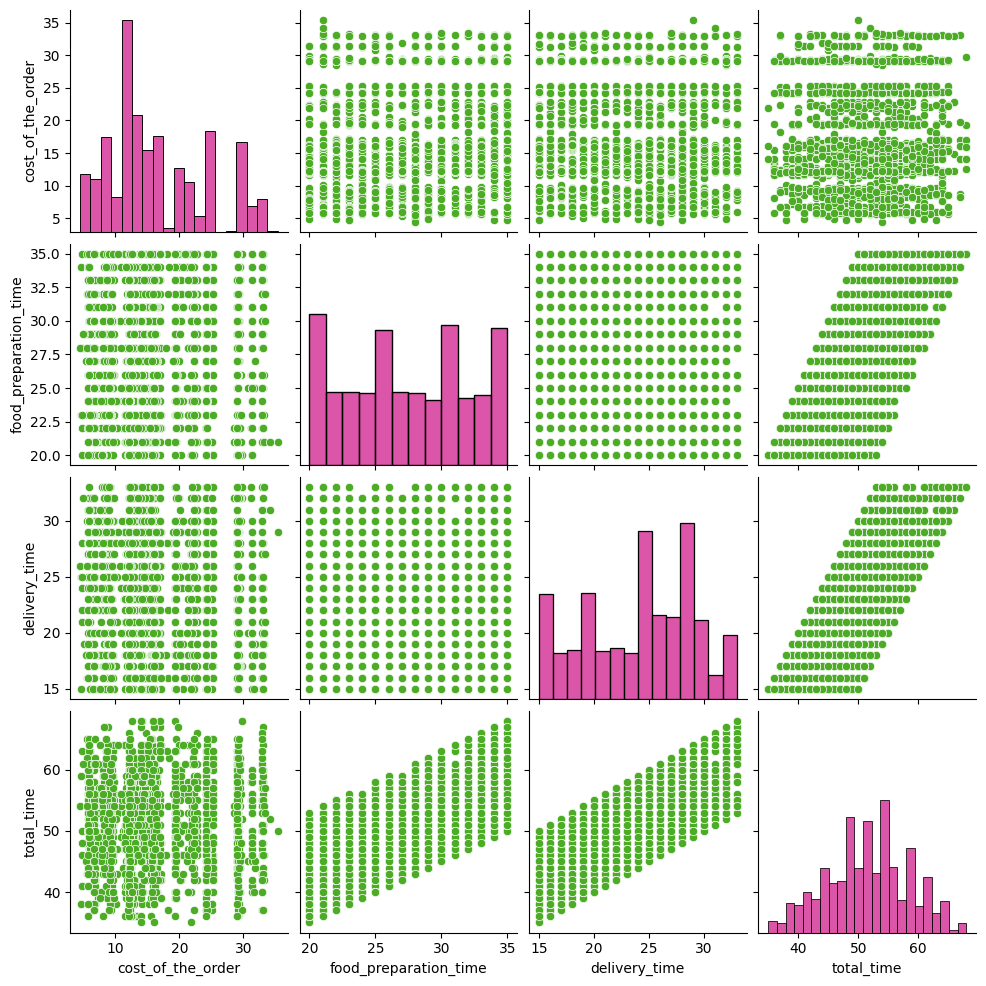

In [31]:
# Let's build a total delivery time variable:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
# Let's look for our keys under the streetlamp first and examine the continuous variables all at once first:
continuous_variables = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'total_time']
sns.pairplot(df[continuous_variables], plot_kws={'color': '#4dac26'},  diag_kws={'color': '#d01c8b'})
plt.show()

# Observations:
* We see, to our great disappointment, that scatterplots here are completely useless.
* We see only a correlation between total time and the variables that it is made of

Text(0.5, 1.0, 'Heat Map All Continuous Variables')

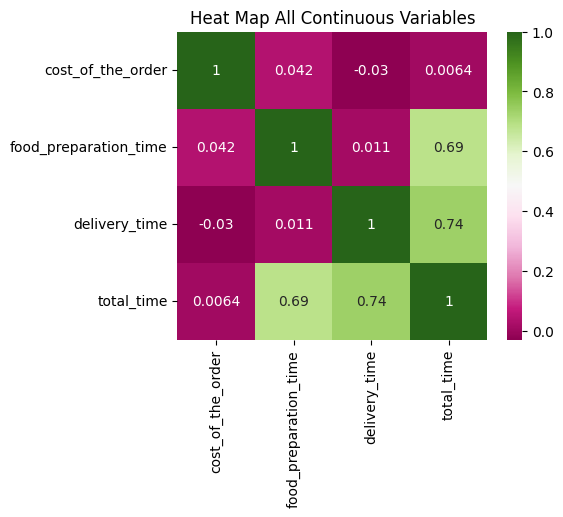

In [32]:
# Let's try with heatmap:
plt.figure(figsize=(5, 4))
sns.heatmap(df[continuous_variables].corr(), annot=True, cmap='PiYG')
plt.title('Heat Map All Continuous Variables')

# Observation:
* Nothing Meaningful correlates. Remember, delivery time and preperation time constitute total time, so it is not surprising that they correlate. These are not the correlations we are looking for.

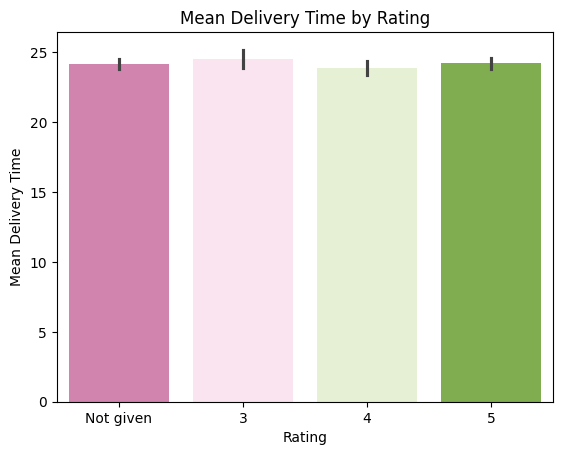

In [33]:
order = ['Not given', 3, 4, 5]
sns.barplot(data=df, x='rating', y='delivery_time', order = order, palette='PiYG')
plt.ylabel('Mean Delivery Time')
plt.xlabel('Rating')
plt.title('Mean Delivery Time by Rating')
plt.show() # No correlation.

Observation:
* Surprisingly, longer delivery time does **not** affect rating (customer satisfaction).

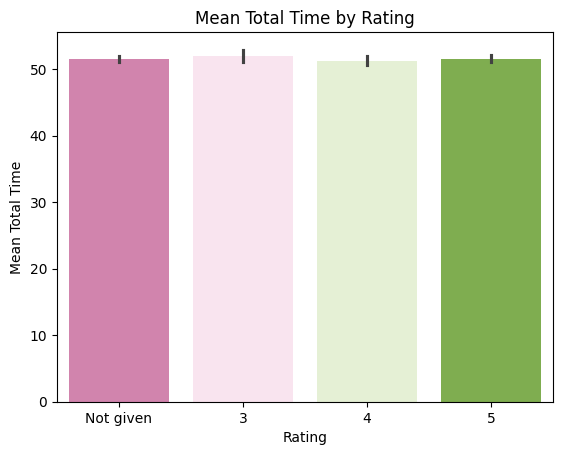

In [34]:
order = ['Not given', 3, 4, 5]
sns.barplot(data=df, x='rating', y='total_time', order=order, palette='PiYG') # ordinal ==> Rating is on X
plt.ylabel('Mean Total Time')
plt.xlabel('Rating')
plt.title('Mean Total Time by Rating')
plt.show()

Observation:
* Surprisingly, total time does **not** affect rating (customer satisfaction).

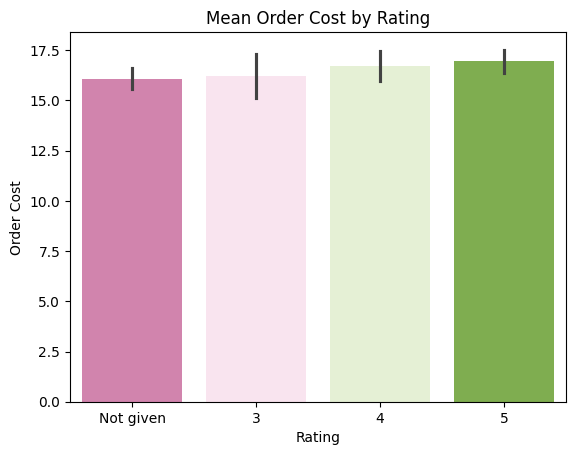

In [35]:
order = ['Not given', 3, 4, 5]
sns.barplot(data=df, x='rating', y='cost_of_the_order', order=order, palette='PiYG') # ordinal ==> Rating is on X
plt.ylabel('Order Cost')
plt.xlabel('Rating')
plt.title('Mean Order Cost by Rating')
plt.show()

# Observation:
 We see higher cost means for higher ratings, but the gaps fall between the confidence interval. No significant correlation.


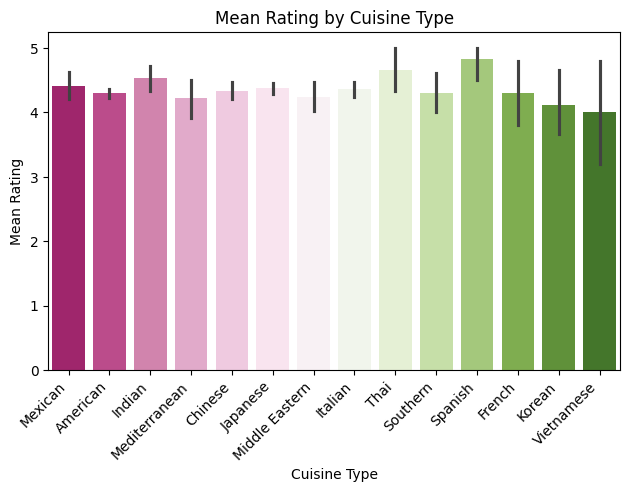

In [36]:
# Let's see if mean rating changes between different cuisines:
dfrating =  df[df['rating'] != 'Not given']  # Exclude Missing Values
dfrating['rating_ordinal'] = pd.to_numeric(dfrating['rating'], errors='coerce')  # Change to numeric
sns.barplot(data=dfrating, x='cuisine_type', y='rating_ordinal', hue='cuisine_type', palette='PiYG')
plt.ylabel('Mean Rating')
plt.xlabel('Cuisine Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title('Mean Rating by Cuisine Type')
plt.show()

# Observations:
* Differences are not dramatic. Moreover - cuisines with lowest rating - Vietnamese, Korean and French, have wider confidence interval and less observations.
* Nothing here is a true game changer businesswise, especially when we see confidence interval overlap - no mean difference across cuisine type is statistically significant.

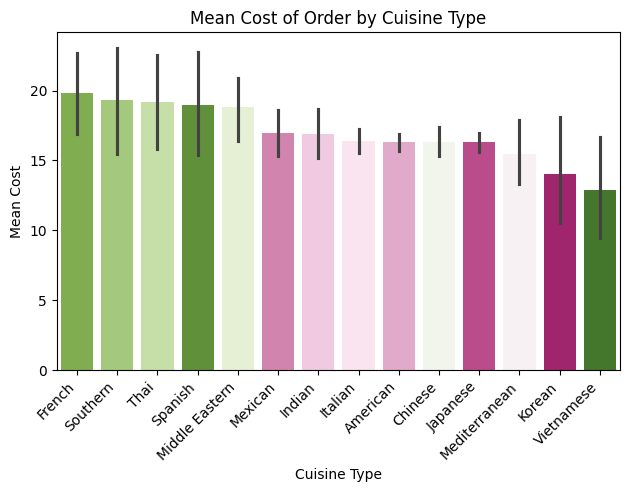

In [37]:
# Let's see if mean cost changes between different cuisines:
order = df.groupby('cuisine_type')['cost_of_the_order'].mean().sort_values(ascending=False).index
sns.barplot(data=df, x='cuisine_type', y='cost_of_the_order', hue='cuisine_type', order=order, palette='PiYG')
plt.ylabel('Mean Cost')
plt.xlabel('Cuisine Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title('Mean Cost of Order by Cuisine Type')
plt.show()

# Observations:
* Differences are not dramatic. Moreover - cuisines with lowest cost - Vietnamese and Korean as well as highest - French, Southern and Thai, have wider confidence interval and less observations.
* Here too, nothing is a true game changer businesswise, especially when we see confidence intervals overlap - no mean difference across cuisine type is statistically significant.

#Churn & Loyalty: Customers, Orders and Restaurant multivariate Analysis:
* We saw earlier that we have a churn problem in our app. lets make a multivariate analysis, using calculated fields based on customer count,
*  First let's create for each restaurant a KPI - Returning Customers Ratio - the ratio between # of total unique customers o to total # of orders.
* A value of 1 is the lowest and means that the # of orders == # of unique customers, which means that no one returned to order from the restaurant once again. These restaurants are "Protal Users Burners"
* The higher the ratio - the more returning customers the particular restaurant has. These restaurants create stickiness, loyalty and engagement. These restaurants are "Loyalty Generators"

In [38]:
dfres2 = (                                 # Grouping # orders and # unique customers by restaurant
    df.groupby('restaurant_name')
    .agg(
        num_orders=('order_id', 'count'),
        num_unique_customers=('customer_id', 'nunique'),
    )
    .reset_index()
)

dfres2['returning_customer_ratio'] = dfres2['num_orders'] / dfres2['num_unique_customers'] # Creating the calculated column
dfres2 = dfres2.sort_values('returning_customer_ratio', ascending=False)
dfres2.head()

,restaurant_name,num_orders,num_unique_customers,returning_customer_ratio
90,Lantern Thai Kitchen,4,1,4.0
8,Asuka Sushi,3,1,3.0
52,DuMont Burger,3,1,3.0
82,Junoon,5,2,2.5
99,Mission Cantina,5,2,2.5


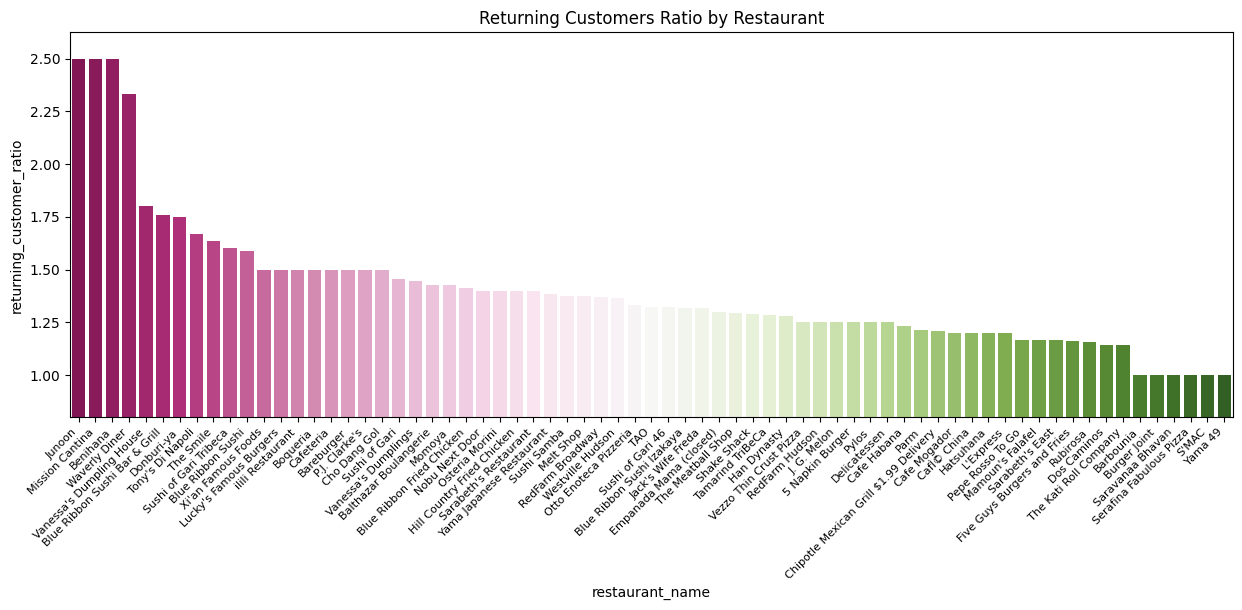

In [39]:
#order count & restaurant name and rate Top and Bottom restaurants by returning customers, but only restaurants with >= 5 orders.
plt.figure(figsize=(15, 5))
dfres2 = dfres2[dfres2['num_orders'] >= 5]
sns.barplot(data=dfres2, x='restaurant_name', y='returning_customer_ratio', hue='restaurant_name', palette='PiYG')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.ylim(0.8, None)
plt.title('Returning Customers Ratio by Restaurant')
plt.show()

# Observations:
* As sayed before: A value of 1 is the lowest and means that the # of orders == # of unique customers, which means that no one returned to order from the restaurant once again. These restaurants are "App Users Burners": Yama 49; S'MAC; Serafina Fabulous Pizza; Saravanaa Bhavan; Burger Joint and so on.


* The higher the ratio - the more returning customers the particular restaurant has. These restaurants create stickiness, loyalty and engagement. These restaurants are "Loyalty Generators": Junoon; Mission Cantina; Benihana; Vanessa's Dumpling House and so on.

* We will make further drilldowns later on, when we will get to revenue.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [40]:

mean_ratings = dfrating.groupby('restaurant_name')['rating_ordinal'].mean().reset_index()  # mean by restaurant
if 'avg_rating' in dfres.columns:                     # Drop if exists
    dfres = dfres.drop(columns=['avg_rating'])
if 'rating_ordinal' in dfres.columns:
    dfres = dfres.drop(columns=['rating_ordinal'])
dfres = dfres.merge(mean_ratings, on='restaurant_name') # Merge
dfres = dfres.rename(columns={'rating_ordinal': 'avg_rating'})
dfres = dfres.sort_values('avg_rating', ascending=False)
dfres = dfres[dfres['num_orders'] > 50].copy()   # Only restaurants with >50 orders - but only for this table

print(dfres.head(4))


               restaurant_name  num_orders  avg_rating
132          The Meatball Shop         132    4.511905
16   Blue Ribbon Fried Chicken          96    4.328125
117                Shake Shack         219    4.278195
104           RedFarm Broadway          59    4.243902


#### Observations:
The 4 restaurants are:
The Meatball Shop;  
Blue Ribbon Fried Chicken;
Shake Shack;
RedFarm Broadway


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [41]:
df['charge'] = df['Is more than 20$'].apply(lambda x: 0.25 if x == 'Yes' else 0.15)  # creating colums using lambda expression to calssify order charge in %
df['net_revenue'] = df['cost_of_the_order'] * df['charge']   # %charge * $ Price = $ Revenue
net_revenue = df['net_revenue'].sum()
print(net_revenue)

6172.714


# Observation:
Total Revenue: 6172.714 USD

In [42]:
# Now we have a new variable - revenue. let's examine it against other variables.
# Let's add it to the aggregated-by restaurant data frame
dfres3 = (
    df.groupby('restaurant_name')
    .agg(
        num_orders=('order_id', 'count'),
        num_unique_customers=('customer_id', 'nunique'),
        total_revenue=('net_revenue', 'sum'),                # adding revenue to our aggregated-by-restaurant data frame
        cuisine=('cuisine_type', 'first')
    )
    .reset_index()
)

dfres3['returning_customer_ratio'] = dfres3['num_orders'] / dfres3['num_unique_customers'] # Creating the calculated column
dfres3 = dfres3.sort_values('returning_customer_ratio', ascending=False)
dfres3.head()

,restaurant_name,num_orders,num_unique_customers,total_revenue,cuisine,returning_customer_ratio
90,Lantern Thai Kitchen,4,1,17.2295,Thai,4.0
8,Asuka Sushi,3,1,14.3050,Japanese,3.0
52,DuMont Burger,3,1,15.2090,American,3.0
82,Junoon,5,2,27.8905,Indian,2.5
99,Mission Cantina,5,2,16.0325,Mexican,2.5


In [48]:
!pip install -U kaleido

In [49]:
import plotly.io as pio
pio.kaleido.scope  # should not throw an error

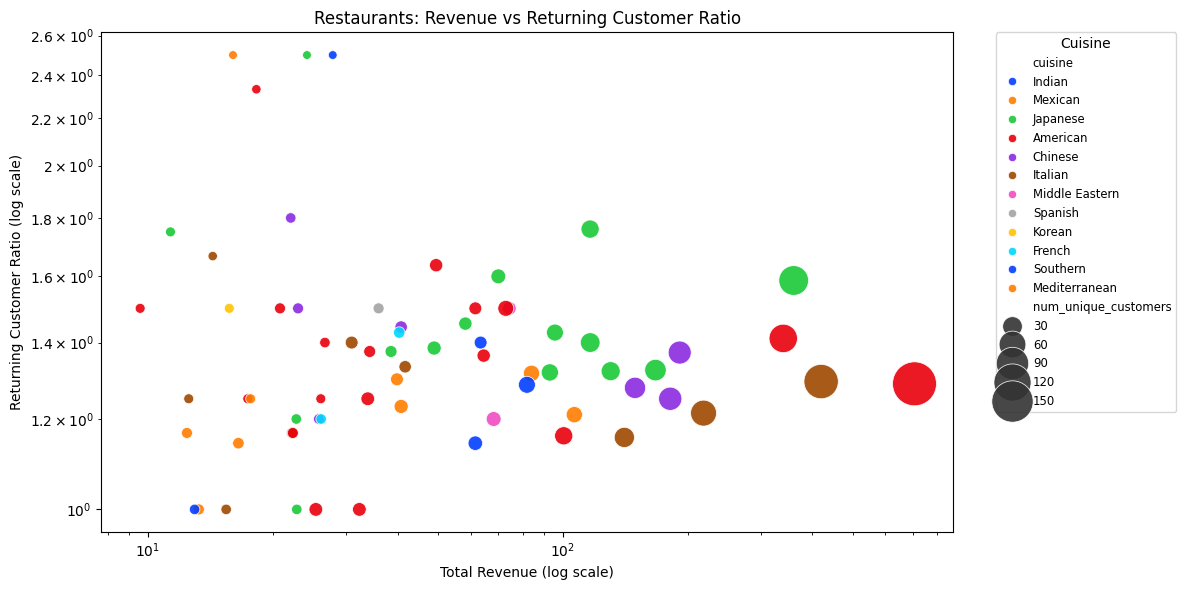

In [63]:
# Filter data
dfres3 = dfres3[dfres3['num_orders'] >= 5].copy()

# Setup figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot
sns.scatterplot(
    data=dfres3,
    x='total_revenue',
    y='returning_customer_ratio',
    hue='cuisine',
    size='num_unique_customers',
    sizes=(40, 1000),
    alpha=0.9,
    palette='bright',
    ax=ax
)

# Log scale axes
ax.set_xscale('log')
ax.set_yscale('log')

# Labels and title
ax.set_title('Restaurants: Revenue vs Returning Customer Ratio')
ax.set_xlabel('Total Revenue (log scale)')
ax.set_ylabel('Returning Customer Ratio (log scale)')

# Legend
ax.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0,
    title='Cuisine',
    fontsize='small',
    title_fontsize='medium'
)

# Save and display
plt.tight_layout()
plt.savefig('seaborn_scatter_fixed.png', dpi=300, bbox_inches='tight')
plt.show()

## **What This Chart Tells Us?**

This chart divides plots the restaurants by 3 metrics: Total Revenue, Returning Customers Ratio and Total # of orders. Please note that the X and Y axes are log. The differences are higher than seemed.
From this chart we can conclude:

*   Restaurants on the far right are **"Money Makers"**

*   Restaurants on the far High right are both **"Money Makers"** and **"Retention Generators"**. So for example: **Shick Shack** brings a lot of revenue, but returning customers ratio stands on ~1.3. **Blue Ribbon Sushi** on the other hand, brings less revenue, but returning customers ratio stands on ~1.6. It helps the app in increasing recurring revenue and stickiness.
* Restaurants on the very upper part - Y = 1.8 and above, are not true **"Money Makers"** but they make **"Emerging Stars"**. Whith this retention rate they can be real growth engine for the app.
* Restaurants in the bottom are **"Customer Burners"**: customers who ordered from them, never came back. The counter intuitive issue here is that the bigger the bubble size, and the right the bubble is, means that they made more revenue and had more customers, and we may think it is "good for the business" but it means that they had more customers with bad experience. So they may have done **more damage than benefit**.
* We also see a green cluster in X > 100 and Y > 1.3, with 5 green bubbles in Y=1.6 and above. This means that Japaneese Cuisine is on the rise and suitable for the app audience.



The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed?

In [ ]:
# I calculated total_time before, so the column is ready. Now only left to see what % is over 60 mins.
df['Is more than 60 mins'] = df['total_time'].apply(lambda x: 'Over 60' if x > 60 else 'Not Over 60')
percent_distribution = df['Is more than 60 mins'].value_counts(normalize=True) * 100
percent_distribution = percent_distribution.round(1).astype(str) + '%'
print(percent_distribution) # almost 90% of the orders are not over 60 mins.

In [ ]:
# Let's see if chnaging delivery time to a binary column: over 60 mins and under 60 mins, make change regarding to impact on rating:
plt.figure(figsize=(3, 4))
sns.barplot(data=df, x='Is more than 60 mins', y='rating', hue='Is more than 60 mins')
plt.gca().invert_yaxis()
plt.title('Extra Long Total Delivery Time - Effect on Rating')
plt.show()

#### Observations:
* We see that even when delivery is over 60 min, rating is not significantly different

The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
plt.figure(figsize=(3, 4))
sns.barplot(data=df, x='day_of_the_week', y='delivery_time', hue='day_of_the_week')
plt.ylabel('Mean Delivery Time')
plt.xlabel('Day of the Week')
plt.title('Delivery Time by Day of the Week')
plt.show()   # delivery time during weekend is shorter and stands on ~22.5 mins while in weekdays on 28 mins.

In [ ]:
# Let's check the distribution:
sns.violinplot(data=df, x='day_of_the_week', y='delivery_time', hue='day_of_the_week', inner="quart")
plt.title('Delivery Time by Day of the Week - Detailed Distribution')
plt.show()

# Observations:
* Delivery time on weekdays is really higher. Not only the mean is higher, the entire distribution moves, as all quartiles are higher.

* The real interesting question is why. I can think of two possible answers: 1) On weekends there are far more orders, so it takes less time to orders to accumulate to a quantity that will launch a delivery. 2) Less traffic on weekends.


# **Conclusions and Recommendations**

### Conclusions:
* Changes in **rating** and **order cost** across different dimenssions are missleading. It is easy to conclude false recommendations based upon them, but the appeared differences are statistically inconclusive.

* Loyalty is low, but differs across restaurants. See Reccomendations.

* The majority of orders is on the weekends. See Reccomendations.

* Missing Rating: give incentives for rating submission for more quality control

* Delivery time on weekdays is higher.

* No interesting correlation between variables. No strong connections that can move the needle business wise in terms of customer satisfaction (rating)


### Recommendations:
*  Loyalty is low. There is a lot of churn and high % of 'one-timers'. Possible actions: Increase loyalty with loyalty programs, vouchers, discounts, promotions, focus group on app satisfaction (not restaurant satisfaction). Identify first users before their first order and recommend them restaurants with high customer return rate. Consider screening out "Customer Burning" restaurants. Promote "Emerging" restaurants with high return rate. Identify more restaurants from "Emerging" cuisine: Japanese, and add them to the service.

* Missing Rating: give incentives for rating submission for more quality control

* Focus on popular cuisines: Japanese; American; Itlian; Chinese. Identify potential restaurants to add to the service.

* 70% of orders are low revenue orders - under USD20 and under 15% rev. consider a mild price change - a mid category - orders of USD15-USD20 will be charged 20%

* Most of the orders are on the weekend. This means the app is missing an important audience: Office workers who order lunch. Encourage and promote "Lunch deal" / "Lunch Special"

* Delivery time on weekdays is higher - Chack if it is due to traffick or logistical reasons. If logistical reasons - adjust logistically - more delivery persoennel / vehicles. Although, we must say that we did not prove correlation between longer delivery time and customer dissatisfaction.

---